In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_colwidth', None)


In [2]:
orders = pd.read_excel("/kaggle/input/order-data/order_data.xlsx")

orders.shape

(2652, 14)

In [3]:
orders.isna().sum()

id                                  0
transaction_id                      0
type                                0
product_id                        658
product_name                        0
category                         1433
Garment Size/Shipping Details      45
color_name                       1433
embroidery_line_2                1558
price                               0
total_amount                        0
shipping_method                     0
order_created_at                    0
order_updated_at                    0
dtype: int64

In [4]:
orders.head(5)

/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,id,transaction_id,type,product_id,product_name,category,Garment Size/Shipping Details,color_name,embroidery_line_2,price,total_amount,shipping_method,order_created_at,order_updated_at
0,684,234,product,169.0,4-Pocket Scrub Top + Cargo Jogger Pants MoveTechâ“‡ Scrub Suit Set - Preorder,mt_scrubsuit_f,Small,Cerulean,NaN,2790,2990,Local Courier Shipping Fees - Luzon Area,2020-12-15 19:10:23,2020-12-18 11:10:51
1,685,234,shipping,NaN,shipping,NaN,Local Courier Shipping Fees - Luzon Area,NaN,NaN,200,2990,Local Courier Shipping Fees - Luzon Area,2020-12-15 19:10:23,2020-12-15 19:10:23
2,686,235,product,170.0,3-Pocket Scrub Top + Straight Cut Pants MoveTechâ“‡ Scrub Suit Set - Preorder,mt_scrubsuit_f,Medium,Graphite,NaN,2790,2790,"Rider (Angkas, Lalamove, Grab, etc..) shouldered by customer",2020-12-15 19:14:27,2020-12-17 11:14:25
3,687,235,shipping,NaN,shipping,NaN,"Rider (Angkas, Lalamove, Grab, etc..) shouldered by customer",NaN,NaN,0,2790,"Rider (Angkas, Lalamove, Grab, etc..) shouldered by customer",2020-12-15 19:14:27,2020-12-15 19:14:27
4,688,236,product,171.0,4-Pocket Scrub Top + Cargo Jogger Pants MoveTechâ“‡ Scrub Suit Set - Preorder,mt_scrubsuit_m,Medium,Graphite,INTERNAL MEDICINE,2790,2990,"Rider (Angkas, Lalamove, Grab, etc..) shouldered by customer",2020-12-15 19:32:21,2020-12-15 22:41:53


# What is the best selling item for Females

In [5]:
products_female = orders[(orders['type'] == 'product') & (orders['category'].str.endswith('f', na=False))]
female_product_name_counts = products_female['product_name'].value_counts()
female_product_name_counts.to_frame()

,count
product_name,
4-Pocket Scrub Top + Cargo Jogger Pants MoveTechâ“‡ Scrub Suit Set - Preorder,290
3-Pocket Scrub Top + Straight Cut Pants MoveTechâ“‡ Scrub Suit Set - Preorder,106
Cargo Jogger MoveTechâ“‡ Scrub Pants - Preorder,95
3-Pocket MoveTechâ“‡ Scrub Top - Preorder,92
4-Pocket MoveTechâ“‡ Scrub Top - Preorder,52
Cargo Jogger MoveTechâ“‡ Scrub Pants,39
2-Pocket MoveTechâ“‡ Scrub Top,37
Long Sleeves Blazer,30
Straight Cut MoveTechâ“‡ Scrub Pants - Preorder,20


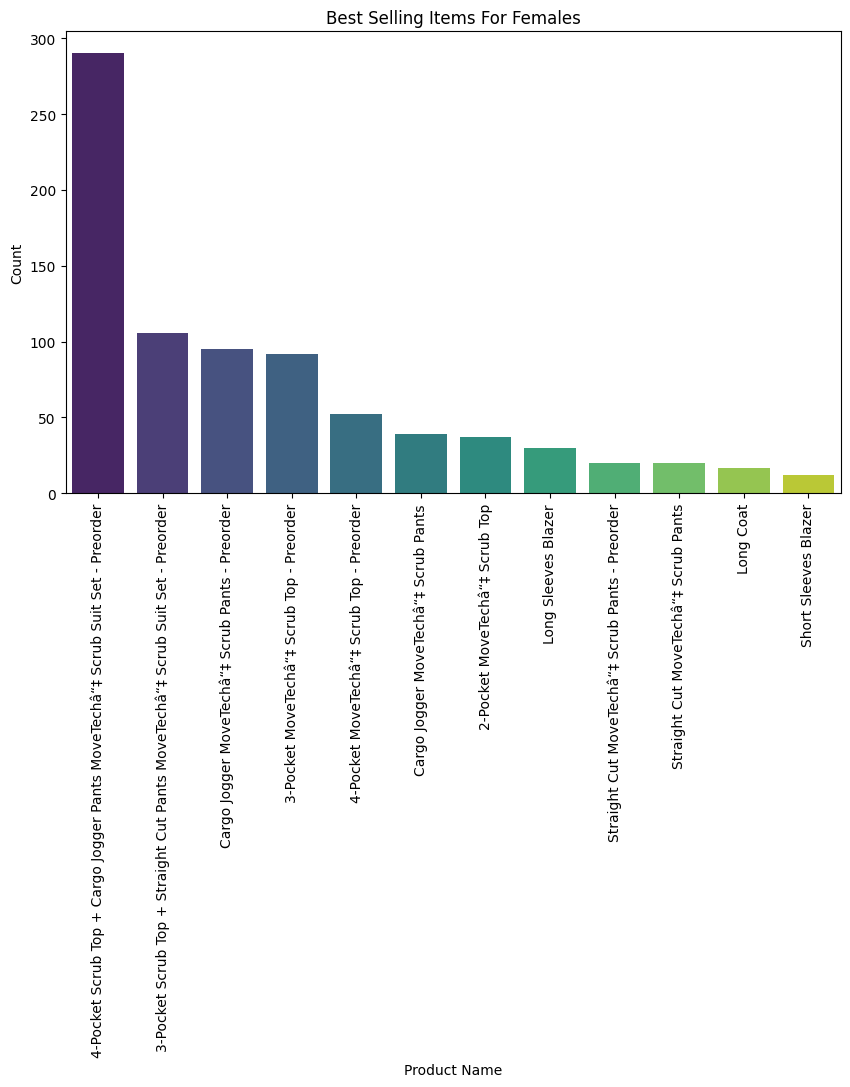

In [6]:
plt.figure(figsize=(10,6))
sns.barplot(x=female_product_name_counts.index, y=female_product_name_counts.values, palette='viridis')

plt.xticks(rotation=90)
plt.xlabel("Product Name")
plt.ylabel("Count")
plt.title("Best Selling Items For Females")

plt.show()


#  What is the best selling item for Males?

In [7]:
products_male = orders[(orders['type'] == 'product') & (orders['category'].str.endswith('m', na=False))]
male_product_name_counts = products_male['product_name'].value_counts()
male_product_name_counts.to_frame()


,count
product_name,
4-Pocket Scrub Top + Cargo Jogger Pants MoveTechâ“‡ Scrub Suit Set - Preorder,128
3-Pocket Scrub Top + Straight Cut Pants MoveTechâ“‡ Scrub Suit Set - Preorder,86
3-Pocket MoveTechâ“‡ Scrub Top - Preorder,48
Cargo Jogger MoveTechâ“‡ Scrub Pants - Preorder,32
4-Pocket MoveTechâ“‡ Scrub Top - Preorder,27
2-Pocket MoveTechâ“‡ Scrub Top,24
Straight Cut MoveTechâ“‡ Scrub Pants - Preorder,21
Long Sleeves Blazer,18
Long Coat,8


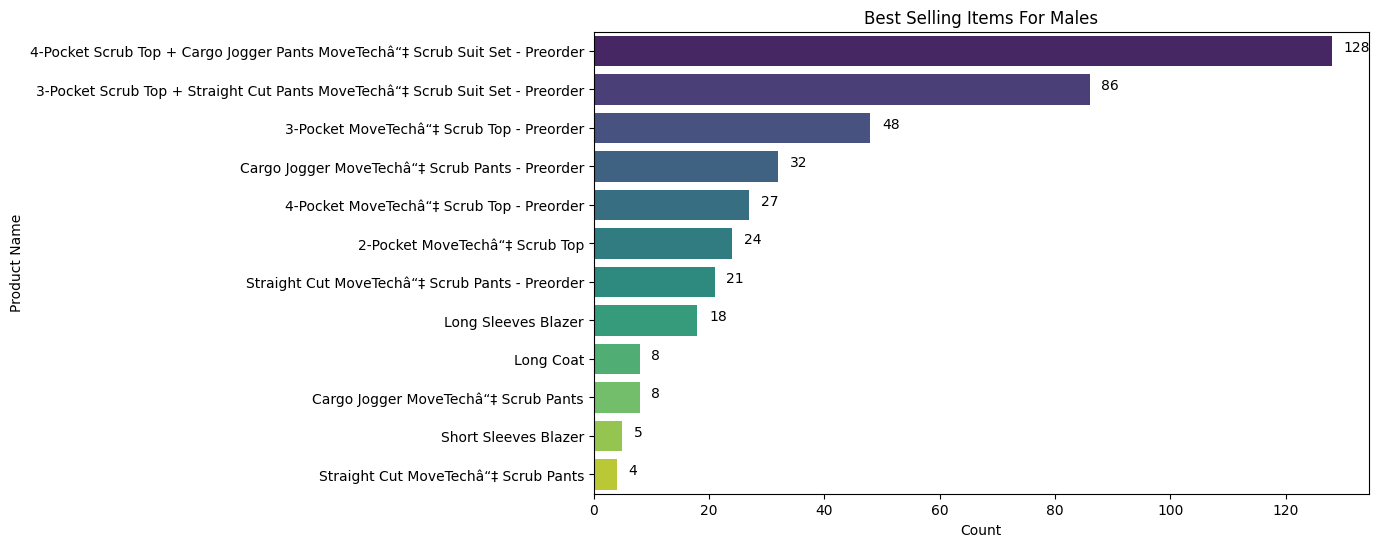

In [8]:
plt.figure(figsize=(10,6))
ax = sns.countplot(y=products_male['product_name'], order=products_male['product_name'].value_counts().index, palette='viridis')

for i, v in enumerate(products_male['product_name'].value_counts()):
    ax.text(v + 2, i, str(v), ha='left', fontsize=10)

plt.xlabel("Count")
plt.ylabel("Product Name")
plt.title("Best Selling Items For Males")
plt.xticks(rotation=0)
plt.show()

#  Each Transaction ID can have multiple items inside it, What was the most common combination of Product Names inside each Transaction ID?

In [9]:
product_orders = orders[(orders['type'] == 'product')]

transaction_combinations = product_orders.groupby('transaction_id')['product_name'].apply(lambda x: ', '.join(sorted(x.dropna())))

combination_counts = transaction_combinations.value_counts()

most_common_combinations = combination_counts.to_frame().reset_index()
most_common_combinations.columns = ['Product Combination', 'Count']

most_common_combinations.head(10)


,Product Combination,Count
0,4-Pocket Scrub Top + Cargo Jogger Pants MoveTechâ“‡ Scrub Suit Set - Preorder,185
1,3-Pocket Scrub Top + Straight Cut Pants MoveTechâ“‡ Scrub Suit Set - Preorder,72
2,"4-Pocket Scrub Top + Cargo Jogger Pants MoveTechâ“‡ Scrub Suit Set - Preorder, 4-Pocket Scrub Top + Cargo Jogger Pants MoveTechâ“‡ Scrub Suit Set - Preorder",56
3,Long Sleeves Blazer,29
4,"3-Pocket Scrub Top + Straight Cut Pants MoveTechâ“‡ Scrub Suit Set - Preorder, 4-Pocket Scrub Top + Cargo Jogger Pants MoveTechâ“‡ Scrub Suit Set - Preorder",23
5,"4-Pocket MoveTechâ“‡ Scrub Top - Preorder, Cargo Jogger MoveTechâ“‡ Scrub Pants - Preorder",20
6,"3-Pocket Scrub Top + Straight Cut Pants MoveTechâ“‡ Scrub Suit Set - Preorder, 3-Pocket Scrub Top + Straight Cut Pants MoveTechâ“‡ Scrub Suit Set - Preorder",19
7,"3-Pocket MoveTechâ“‡ Scrub Top - Preorder, Cargo Jogger MoveTechâ“‡ Scrub Pants - Preorder",19
8,Short Sleeves Blazer,13
9,"3-Pocket MoveTechâ“‡ Scrub Top - Preorder, Cargo Jogger MoveTechâ“‡ Scrub Pants",11


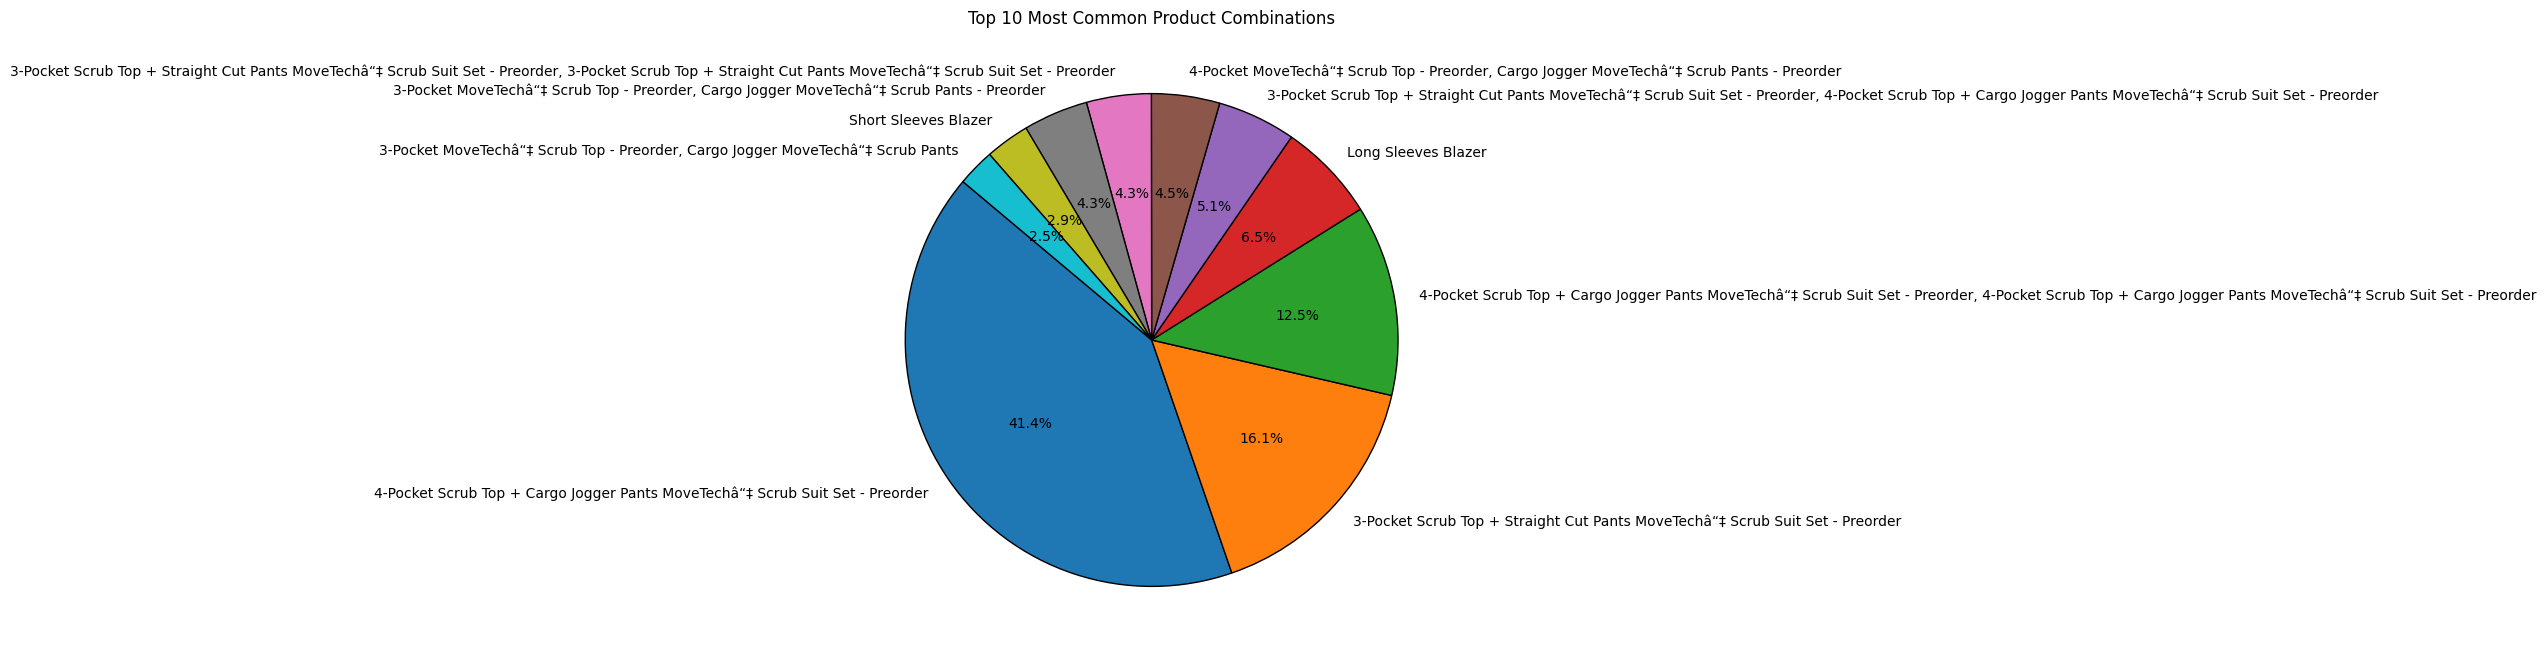

In [10]:
plt.figure(figsize=(8, 8))
plt.pie(most_common_combinations['Count'].head(10), 
        labels=most_common_combinations['Product Combination'].head(10), 
        autopct='%1.1f%%', 
        startangle=140, 
        wedgeprops={'edgecolor': 'black'})
plt.title("Top 10 Most Common Product Combinations")
plt.show()

# The data set runs from December 15, 2020 to January 21, 2021. Which days had the highest orders?

In [11]:
# I change the data types of order_created_at column and order_updated_at into datetime in order to extract the date.
orders['order_created_at'] = pd.to_datetime(orders['order_created_at'])
orders['order_updated_at'] = pd.to_datetime(orders['order_updated_at'])

In [12]:
orders['orders_update_date'] = orders['order_updated_at'].dt.date
highest_amount = orders.groupby('orders_update_date')['total_amount'].sum().to_frame()
highest_amount.columns = ['Total_Amount']
highest_amount_sorted = highest_amount.sort_values('Total_Amount', ascending=False)

highest_amount_sorted.head(10)


,Total_Amount
orders_update_date,
2020-12-16,2200210
2020-12-15,1251180
2020-12-19,807435
2020-12-18,793790
2021-01-17,759165
2021-01-18,646320
2020-12-26,540535
2021-01-16,540410
2020-12-17,509525


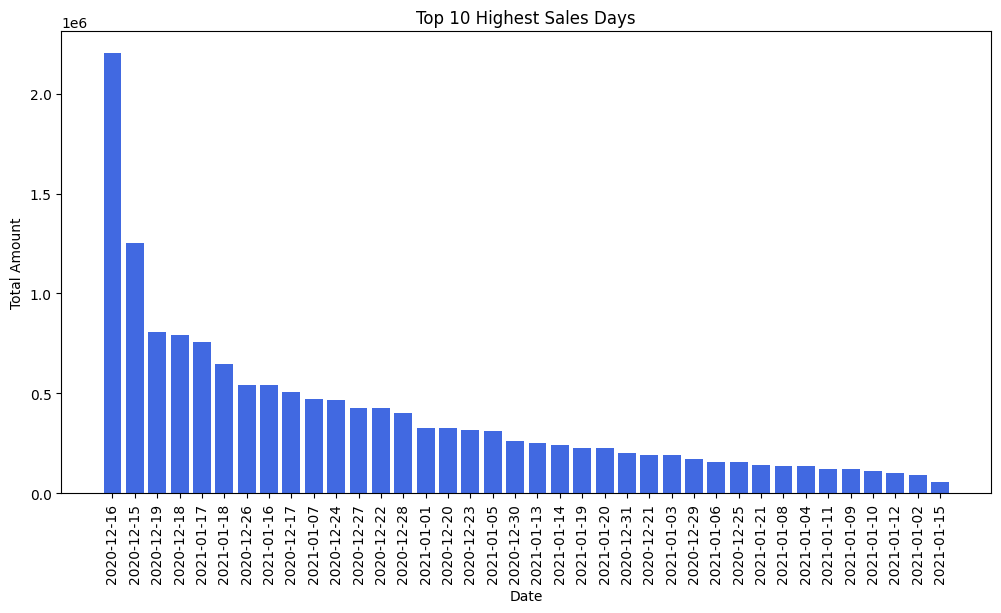

In [13]:
plt.figure(figsize=(12, 6))
plt.bar(highest_amount_sorted.index.astype(str), highest_amount_sorted['Total_Amount'], color='royalblue')


plt.xlabel("Date")
plt.ylabel("Total Amount")
plt.title("Top 10 Highest Sales Days")
plt.xticks(rotation=90)


plt.show()

#  Based on this 2-month data set and the performance of specific colors and sizes, what will be your suggested inventory level for February to March for the following colors: Graphite and Cobalt Blue. Assume a monthly growth rate of 15%. Show calculations.

In [14]:
colors_order = orders[orders['color_name'].isin(['Graphite', 'Cobalt Blue'])].copy()

colors_order['orders_update_date'] = pd.to_datetime(colors_order['orders_update_date'])

colors_order['Month'] = colors_order['orders_update_date'].dt.strftime('%B')


In [15]:
colors_order_grouped = colors_order.groupby(['color_name', 'Month'])['total_amount'].sum().unstack()
colors_order_grouped

Month,December,January
color_name,,
Cobalt Blue,1545645,1074770
Graphite,1727235,507655


In [16]:
growth_rate = 0.15

february_projection = (colors_order_grouped.iloc[:,1] * (1 + growth_rate)).to_frame('February')
february_projection


,February
color_name,
Cobalt Blue,1235985.50
Graphite,583803.25


In [17]:
pd.set_option('display.float_format', '{:.2f}'.format)

march_projection  = february_projection * (1 + growth_rate)
march_projection.columns = ['March']
march_projection

,March
color_name,
Cobalt Blue,1421383.32
Graphite,671373.74


In [18]:
colors_order_grouped['February_Projection'] = february_projection
colors_order_grouped['March_Projection'] = march_projection

colors_order_grouped

Month,December,January,February_Projection,March_Projection
color_name,,,,
Cobalt Blue,1545645,1074770,1235985.50,1421383.32
Graphite,1727235,507655,583803.25,671373.74


/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to 

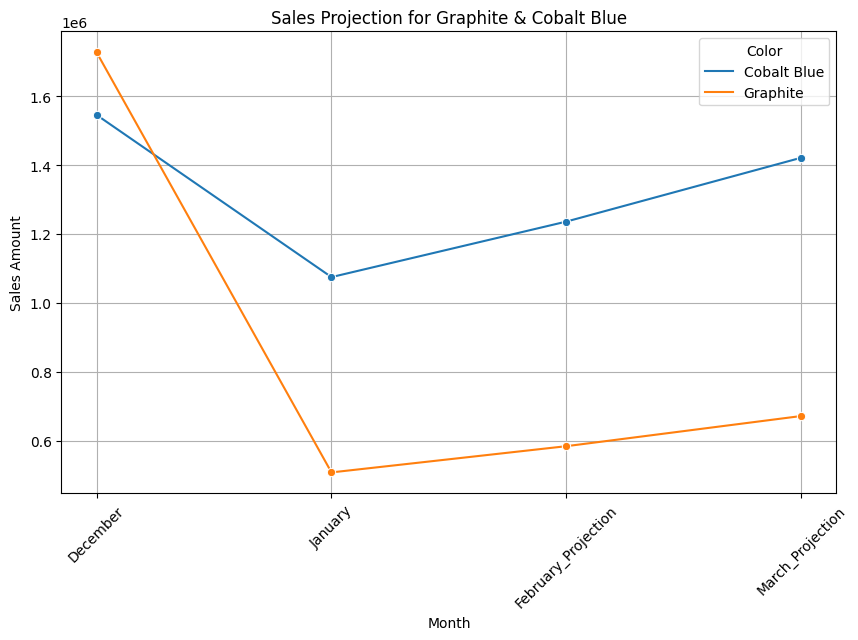

In [19]:
melted_df = colors_order_grouped.reset_index().melt(id_vars='color_name', var_name='Month', value_name='Sales')


plt.figure(figsize=(10, 6))


sns.lineplot(data=melted_df, x='Month', y='Sales', hue='color_name', marker='o')


plt.xlabel("Month")
plt.ylabel("Sales Amount")
plt.title("Sales Projection for Graphite & Cobalt Blue")
plt.xticks(rotation=45)
plt.grid(True)
plt.legend(title="Color")


plt.show()